### CNN IMAGE CLASSIFIER : EMOTION RECOGNITION FROM FACIAL EXPRESSIONS

Name : Dario Prawara Teh Wei Rong

<u>Project Description:</u><br>

The "Emotion Recognition from Facial Expressions" project focuses on training a machine learning model to accurately recognize human emotions from facial expressions in images. Emotion recognition has wide-ranging applications, including mental health support, market research, and user experience design. This project aims to contribute to the development of an efficient and robust model for accurately identifying emotions in real-world scenarios.

<u>Project Objectives:</u>

- Developing a deep learning model that can recognize and classify various emotions, such as happiness, sadness, anger, fear, surprise, and disgust expressions.
- Achieving high categorical accuracy, precision, and recall in emotion recognition.
- Exploring interpretability techniques to understand the model's decision-making process, providing insights into which facial features contribute to emotion classification.

<b>By undertaking this project, I aim to leverage machine learning and computer vision techniques, offering solutions that can positively impact mental health, market insights, and user experience design.</b>

### IMPORTING NECESSARY LIBRARIES AND MODULES

1. Import numpy, pandas, seaborn, sklearn, tensorflow, cv and other relevant modules required.


2. These modules will be used for data visualizations, classifying images etc.

In [25]:
# Importing the relevant modules and libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import computer vision libraries
import tensorflow as tf
import cv2 as cv
import imghdr
from PIL import Image
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
from tensorflow.keras.models import load_model
import os

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

### SETTING GPU MEMORY CONSUMPTION GROWTH

- Avoid OOM errors by setting GPU memory consumption growth. 

- Limit Tensorflow from using all the available VRAM.

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    
# CPU
cpus = tf.config.experimental.list_physical_devices('CPU')
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

### OBTAINING IMAGES FOR CLASSIFICATION

- Obtain images of human faces with varying emotions. - Images used in this analysis is obtained from Kaggle.
- Images can be found in the 'img_data' folder, separated by its respective sub-folders according to the emotion.
- Source for Images : Google Search

### WRANGLING THE IMAGE DATASET

- To wrangle the data, first list the extensions of accepted images, to prevent any 'dodgy' images from being used in this classification analysis.
- Check the data directories to also ensure the folders located in the image directory is accurate for classifying in the later stages.

In [3]:
# Preprocess the data by checking the file extensions and image type

# Initalize the datasets as a data directory
data_dir = 'img_data'

# List the exts of the accepted images
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

# Retrieve the list of accepted images
print('Types of Extensions Allowed for Images:',image_exts)

# Retrieve the data_dir (data directory)
print('Data Directories:',os.listdir(data_dir))

Types of Extensions Allowed for Images: ['jpeg', 'jpg', 'bmp', 'png']
Data Directories: ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise']


### CLEANING AND PROCESSING THE IMAGE DATA 

- Loop through every folder located in the image data directory.
- Retrieve all images found in each sub-directory.
- Check if all images can be loaded into OpenCV and the images matches the allowed paths specified above in image_exts.

In [4]:
# Check if all images can be uploaded to OpenCV and if it matches the ext list

# Initialize a variable to check if all images are within the ext list
accepted_imgs = True

# Loop through each subdirectory (representing image classes) in the data directory
for img_class in os.listdir(data_dir):
    
    # Loop through each image file in the current image class subdirectory
    for img in os.listdir(os.path.join(data_dir, img_class)):
        # Construct the full path to the image file
        img_path = os.path.join(data_dir, img_class, img)
        # Use a try and except condition
        try:
            # Read the image using OpenCV and determine image file type
            img = cv.imread(img_path)
            tip = imghdr.what(img_path)
            
            # Check if the image type is not in the accepted image extensions list
            if tip not in image_exts:
                print('Image not in ext list {}'.format(img_path))
                # Remove the image file from the directory
                os.remove(img_path)
                accepted_imgs = False      
        except Exception as e:
            # Handle exceptions that may occur during image processing
            print('Issue with image {}'.format(img_path))

# Check if all images are within the ext list and print a message accordingly
if accepted_imgs:
    print('All image extensions are found within the ext list.')

Issue with image img_data\angry\.ipynb_checkpoints
Issue with image img_data\disgust\.ipynb_checkpoints
All image extensions are found within the ext list.


### DISPLAYING A SAMPLE IMAGE FROM THE IMAGE DATA
- From the data list, choose a sample image to display to ensure that images can be displayed.
- Use `cv.imread` and `os.path.join()` to process and display the image.

Type of Image: <class 'numpy.ndarray'>
Shape of Image: (192, 262, 3)

Sample Image from "Disgust" image data:


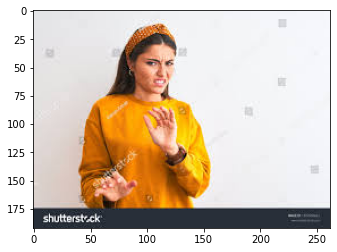

In [5]:
# Displaying a sample image from the data collected
sample = cv.imread(os.path.join('img_data', 'disgust', 'images55.jpg'))

# Check the image type and shape of the image
print('Type of Image:',type(sample))
print('Shape of Image:', sample.shape)

# Show the image
print('\nSample Image from "Disgust" image data:')
plt.imshow(cv.cvtColor(sample,cv.COLOR_BGR2RGB))
plt.grid(False) 
plt.show()

### LOADING THE DATA USING TENSORFLOW KERAS
- To load the data, use Tensorflow and Keras to retrieve and load the image data.
- Convert the data to a numpy data iterator to allow accessing of the data from the data pipeline created.
- Get a batch of data from the data iterator based on the data pipeline created and display the data. 
- `len(batch)` returns 2 : representing the images and the respective labels stored.

In [6]:
# Loading the relevant image data
data = tf.keras.utils.image_dataset_from_directory('img_data', label_mode='categorical')

Found 892 files belonging to 6 classes.


In [7]:
# Iterating the data as a data iterator in numpy
data_iterator = data.as_numpy_iterator()
data_iterator

In [8]:
# Getting a batch of data from the data pipeline created
batch = data_iterator.next()

# Visualising the batch and the number of samples in the batch
print("Number of samples in the batch from the data iterator: ", batch[0].shape[0])
print("\nBatch shape:", batch[0].shape)
print("\nBatch labels shape:", batch[1].shape)

Number of samples in the batch from the data iterator:  32

Batch shape: (32, 256, 256, 3)

Batch labels shape: (32, 6)


In [9]:
# Calculate the class distribution in the batch
class_counts = np.sum(batch[1], axis=0)

# Display the class distribution
print("\nClass Distribution in the Batch:")
for class_idx, count in enumerate(class_counts):
    print(f"Class {class_idx}: {int(count)} samples")


Class Distribution in the Batch:
Class 0: 7 samples
Class 1: 8 samples
Class 2: 7 samples
Class 3: 5 samples
Class 4: 2 samples
Class 5: 3 samples


### VISUALIZING IMAGE DATA OF THE VARIOUS CLASSES
- Plot a countplot to visualize the amount of available data from the 7 image classes.
- From the countplot, it is clear that class 0 and class 2

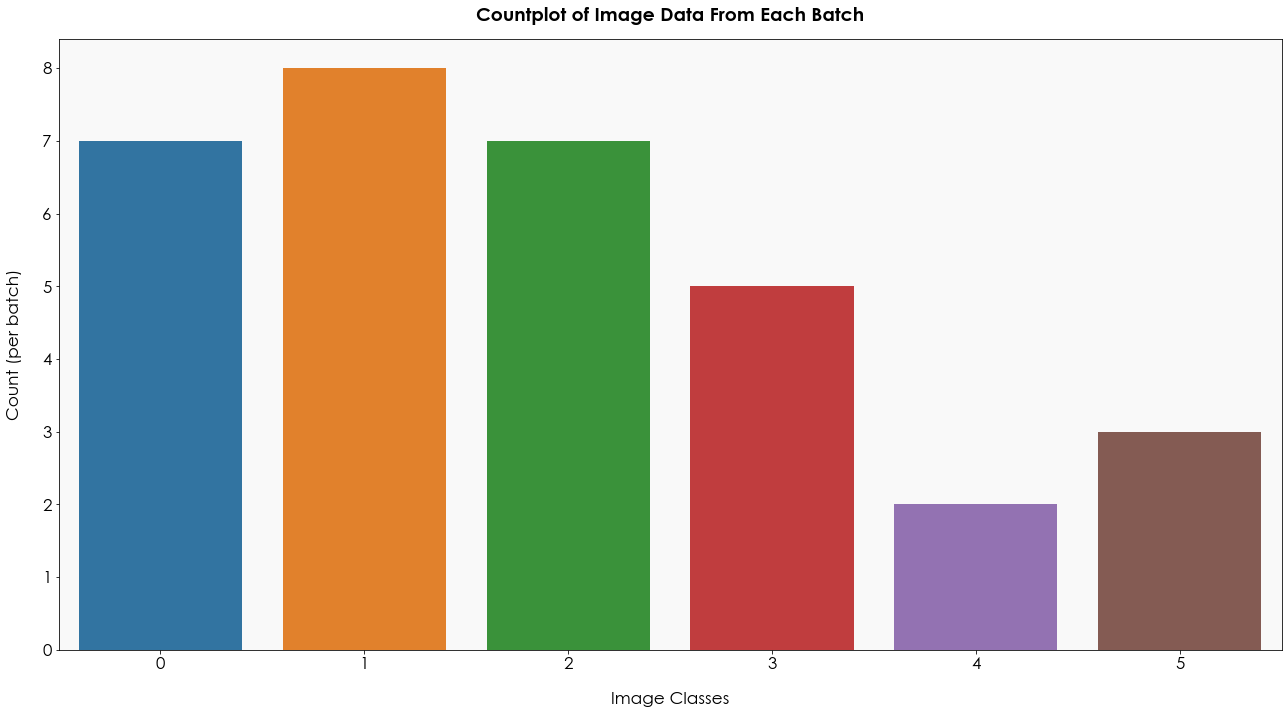

In [10]:
# Plotting a countplot to visualise the image classes

# Set the style and font for the plot
plt.rcParams['font.family'] = 'Century Gothic'

# batch[1] is a one-hot encoded label array
categorical_labels = batch[1]

# Convert one-hot encoded labels to categorical labels
categorical_labels = np.argmax(categorical_labels, axis=1)

# Create the seaborn countplot
plt.figure(figsize=(18, 10))
sns.countplot(x=categorical_labels)

# Set the title and labels
plt.title('Countplot of Image Data From Each Batch', fontsize=19, y=1.02, fontweight=600)
plt.xlabel('Image Classes', fontsize=17, labelpad=20)
plt.ylabel('Count (per batch)', fontsize=17, labelpad=20)

# Set font properties for ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Set background color
plt.gca().set_facecolor('#F9F9F9')

# Display the plot
plt.tight_layout()
plt.show()

### DISPLAYING AN OVERVIEW OF THE IMAGE CLASSES
- Use Matplotlib to display the respective images belonging to the various image classes set.
- Use `plt.subplots()` to display the images.

Assigning Classes as Labels:
- Class 0 = Angry
- Class 1 = Disgust
- Class 2 = Fear
- Class 3 = Happy
- Class 4 = Sad
- Class 5 = Surprise

Assigning Classes as Labels:  {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise'}


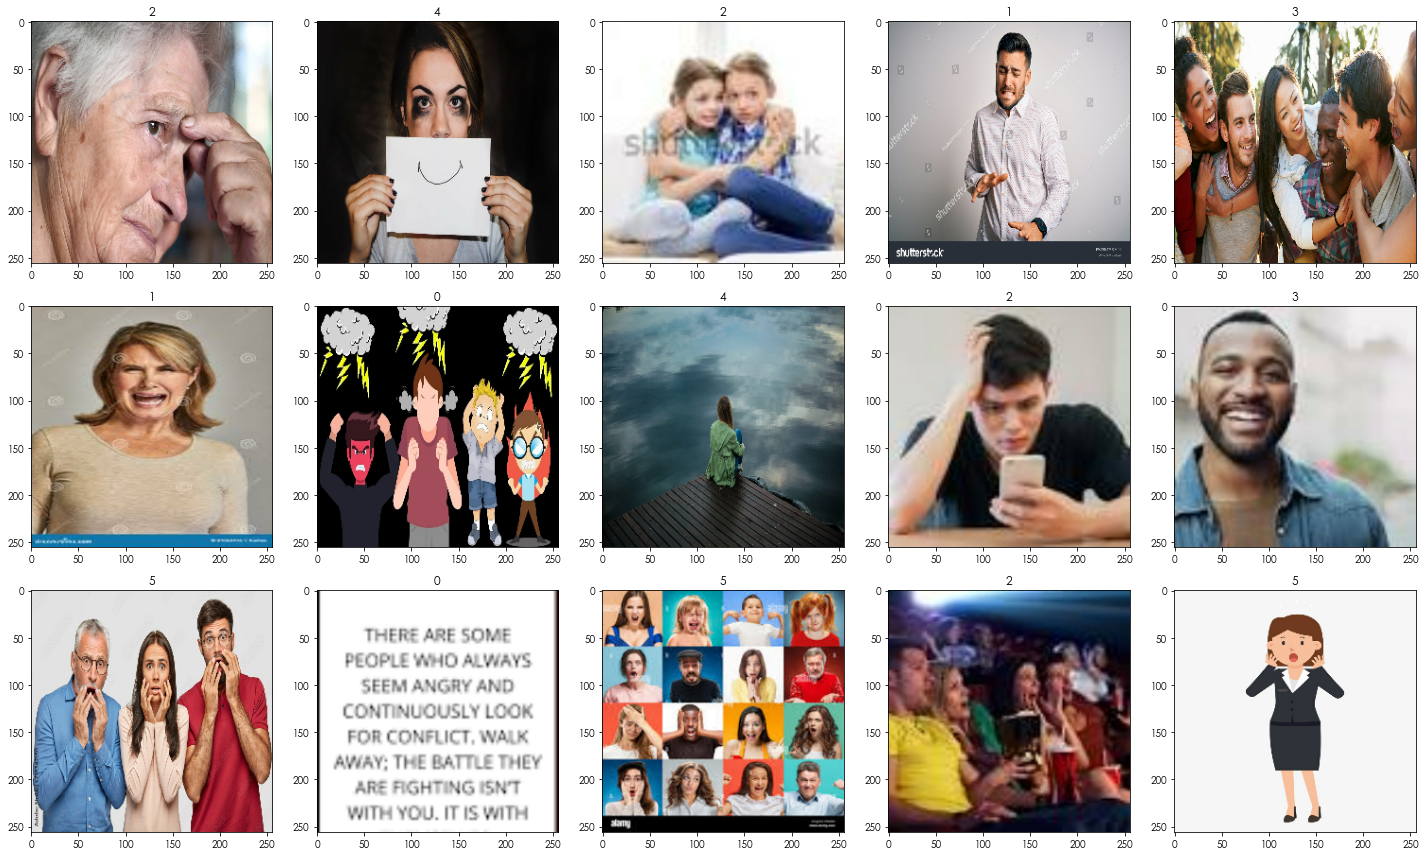

In [11]:
# Displaying an overview of the image classes
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))

# Assign labels to the respective classes
label_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise"}
print('Assigning Classes as Labels: ', label_dict)

# Loop through the images in each batch and arrange them in the grid
for i in range(3):
    for j in range(5):
        idx = i * 5 + j  # Calculate the index for accessing the batch data
        img = batch[0][idx]
        ax[i, j].imshow(img.astype(int))
        ax[i, j].grid(False)
        numeric_label = np.argmax(batch[1][idx])
        text_label = label_dict.get(numeric_label)
        ax[i, j].title.set_text(numeric_label)

plt.tight_layout()
plt.show()

### FEATURE PROCESSING OF THE IMAGE DATA

### SCALING AND NORMALIZING THE DATA 
- Use `.map()` to scale the data and divide by 255 to obtain standardized and normalized values between 0 and 1.
- Upon scaling, the minimum value will be 0 and maximum value will be 1 (instead of 255).

In [12]:
# Scaling the data using .map
data = data.map(lambda x,y: (x/255, y))

# Setting a scaled_iterator
scaled_iterator = data.as_numpy_iterator()

# Selecting the next batch of scaled data
batch = scaled_iterator.next()

#### VIEWING THE MIN AND MAX VALUE IN EACH BATCH
- Use `.min()` and `.max()` to check the minimum and maximum value of each batch.

In [13]:
# Checking the minimum and maximum value in each batch
print("Minimum Value:", batch[0].min())
print("Maximum Value:", batch[0].max())

Minimum Value: 0.0
Maximum Value: 1.0


#### RETRIEVING A SAMPLE SET OF IMAGES UPON SCALING

Note : Do not convert images to integers in this visualization as the data has been scaled to values between 0 and 1.

**If image data is converted to integers here, the images will be completely black in color. Hence, due to scaling, conversion is not required at this stage.**

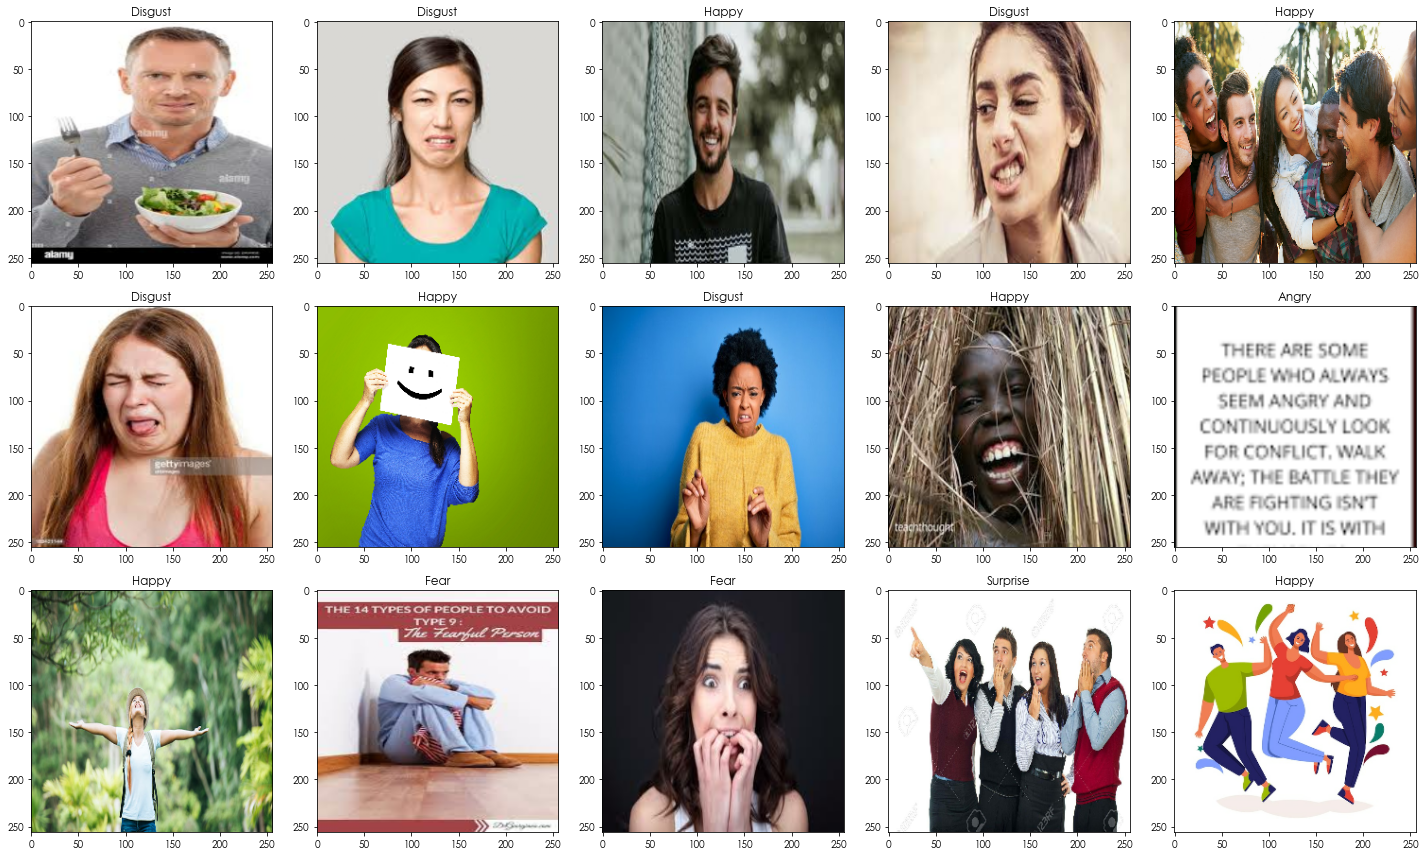

In [14]:
# Displaying an overview of the image classes
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))

# Assign labels to the respective classes
label_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise"}

# Loop through the images in each batch and arrange them in the grid
for i in range(3):
    for j in range(5):
        idx = i * 5 + j  # Calculate the index for accessing the batch data
        img = batch[0][idx]
        ax[i, j].imshow(img)
        ax[i, j].grid(False)
        numeric_label = np.argmax(batch[1][idx])
        text_label = label_dict.get(numeric_label)
        ax[i, j].title.set_text(text_label)

plt.tight_layout()
plt.show()

### SPLITTING INTO TRAINING, VALIDATION AND TESTING SETS

- Split the image dataset into training, validation and test set, which is essential for the effective development and evaluation of models.

- 70% of the data is allocated to training, 15% for validation, and 15% for the test set to predict on unseen test data.

In [15]:
# Splitting the dataset into training, validation and test sets

# Define the proportion of data for each set
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.15)
test_size = int(len(data)*0.15)+1

# Printing the sizes for each data set
print("Size of Data for Training, Validation and Test:")
print("Total Data Size (in batches):", len(data))
print("Train Data Size:",train_size)
print("Validation Data Size:",val_size)
print("Test Data Size:",test_size)

Size of Data for Training, Validation and Test:
Total Data Size (in batches): 28
Train Data Size: 19
Validation Data Size: 4
Test Data Size: 5


In [16]:
# Allocate the data to train, val and test variables
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Printing the sizes for each data set
print("Train Data:",train)
print("\nValidation Data:",val)
print("\nTest Data:",test)

Train Data: <_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

Validation Data: <_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

Test Data: <_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>


### BUILDING AND CREATING THE DEEP LEARNING MODELS

- Initialize an instance of the `Sequential()` model.
- Add the Conv2D, MaxPooling2D and Dense models for classifying images.

In [17]:
# Building and creating the deep learning models

# Initialize the Sequential() model and create the convolutional layers
model = Sequential()

# Initialize the Conv2D, MaxPooling2D and Dense models for classification
model.add(Conv2D(16, (3,3), strides=1, activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), strides=1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), strides=1, activation = 'relu'))
model.add(MaxPooling2D())

# Flatten the feature maps into a 1-D vector for feeding into a fully connected layer
model.add(Flatten())

# Adding the Dense layer and apply the ReLU and sigmoid activation functions
model.add(Dense(256, activation = 'relu'))
model.add(Dense(6, activation = 'softmax'))
          
# Compiling and retrieving the summary of the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### TRAINING AND LOGGING OF THE DEEP LEARNING MODEL

### LOGGING OF THE TENSORFLOW MODEL

- To track the training progress and performance of the model, a logging mechanism is set up using TensorBoard. 

- The log data is stored in the 'logs' directory.

In [18]:
# Logging of the model for analysis and recording
log_dir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)

### FITTING AND EVALUATING OF THE MODEL

Fit the model to the training data and set epochs value for training.
- `train` represents the training dataset.
- `epochs = 20` indicates that the model will be trained for 20 epochs.
- `validation_data=val` specifies the validation dataset to evaluate the model's performance during training.
- `callbacks=[tensorboard_callback]` enables the use of a callback function to log training information for later analysis and visualization using TensorBoard.

In [19]:
# Fitting and training of the model
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
19/19 [==============================] - 39s 2s/step - loss: 1.9022 - accuracy: 0.1530 - val_loss: 1.7887 - val_accuracy: 0.2188
Epoch 2/20
19/19 [==============================] - 42s 2s/step - loss: 1.7641 - accuracy: 0.2418 - val_loss: 1.6841 - val_accuracy: 0.3750
Epoch 3/20
19/19 [==============================] - 41s 2s/step - loss: 1.5816 - accuracy: 0.3668 - val_loss: 1.4540 - val_accuracy: 0.4844
Epoch 4/20
19/19 [==============================] - 34s 2s/step - loss: 1.2723 - accuracy: 0.5263 - val_loss: 1.3102 - val_accuracy: 0.5312
Epoch 5/20
19/19 [==============================] - 34s 2s/step - loss: 0.9799 - accuracy: 0.6924 - val_loss: 1.0474 - val_accuracy: 0.6719
Epoch 6/20
19/19 [==============================] - 34s 2s/step - loss: 0.6022 - accuracy: 0.8207 - val_loss: 0.8112 - val_accuracy: 0.7266
Epoch 7/20
19/19 [==============================] - 35s 2s/step - loss: 0.4271 - accuracy: 0.8783 - val_loss: 0.7344 - val_accuracy: 0.8203
Epoch 8/20
19/19 [==

### VISUALIZING MODEL TRAINING PERFORMANCE
- To evaluate the model, use a loss and accuracy curve to determine if the model training process was successful.
- Ensure that the loss is steadily decreasing over time, and accuracy should be increasing steadily over time.

In [20]:
# Viewing the loss and accuracy scores from training
hist.history

{'loss': [1.9021764993667603,
  1.7640944719314575,
  1.5816071033477783,
  1.2722963094711304,
  0.9799009561538696,
  0.602168083190918,
  0.4270537495613098,
  0.24923615157604218,
  0.13484475016593933,
  0.1252507120370865,
  0.09166619926691055,
  0.11039789021015167,
  0.08230261504650116,
  0.03188270702958107,
  0.047853149473667145,
  0.031155025586485863,
  0.05527688190340996,
  0.01932847686111927,
  0.017159340903162956,
  0.018287023529410362],
 'accuracy': [0.15296052396297455,
  0.24177631735801697,
  0.36677631735801697,
  0.5263158082962036,
  0.6924341917037964,
  0.8207237124443054,
  0.8782894611358643,
  0.9424341917037964,
  0.9654605388641357,
  0.9786184430122375,
  0.9802631735801697,
  0.9868420958518982,
  0.9901315569877625,
  0.9884868264198303,
  0.9884868264198303,
  0.9950658082962036,
  0.9868420958518982,
  0.9967105388641357,
  0.9950658082962036,
  0.9950658082962036],
 'val_loss': [1.7887170314788818,
  1.6841310262680054,
  1.453979730606079,
  1

### PLOTTING THE LOSS AND ACCURACY CURVE

- Use a loss and accuracy curve to determine how well the model performed during the training phase.
- Monitor changes in the validation accuracy and loss to determine if the model was trained well during the training phase.
- Based on the graphs, the validation loss should be steadily decreasing, and the validation accuracy should be steadily increasing.

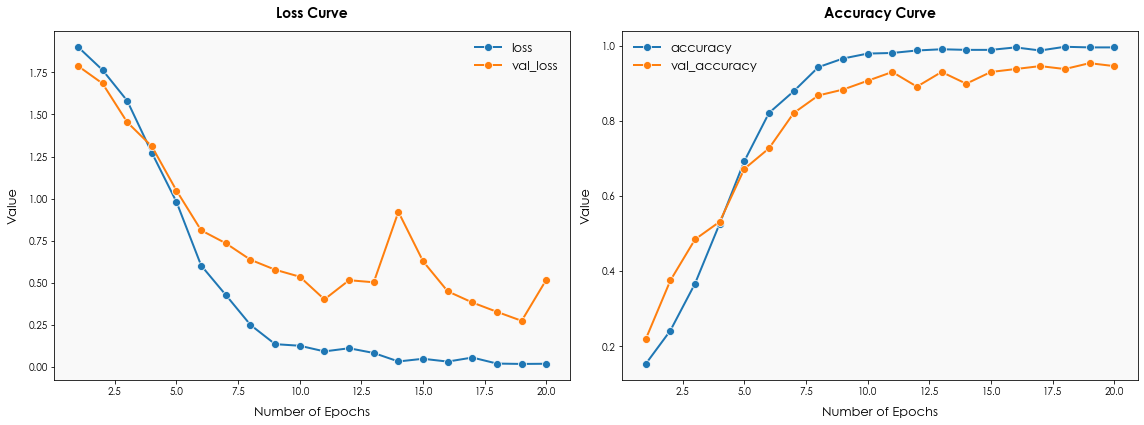

In [21]:
# Plotting the model performance using a loss and accuracy curve

# Set the style and font for the plot
plt.rcParams['font.family'] = 'Century Gothic'

# Create a subplot with two rows and one column
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the loss curve
sns.lineplot(x=range(1, len(hist.history['loss']) + 1), y=hist.history['loss'], ax=axes[0], label='loss', linewidth=2, marker='o', markersize=8)
sns.lineplot(x=range(1, len(hist.history['val_loss']) + 1), y=hist.history['val_loss'], ax=axes[0], label='val_loss', linewidth=2, marker='o', markersize=8)
axes[0].set_title('Loss Curve', fontsize=14, fontweight='bold', y=1.02)

# Plot the accuracy curve
sns.lineplot(x=range(1, len(hist.history['accuracy']) + 1), y=hist.history['accuracy'], ax=axes[1], label='accuracy', linewidth=2, marker='o', markersize=8)
sns.lineplot(x=range(1, len(hist.history['val_accuracy']) + 1), y=hist.history['val_accuracy'], ax=axes[1], label='val_accuracy', linewidth=2, marker='o', markersize=8)
axes[1].set_title('Accuracy Curve', fontsize=14, fontweight='bold', y=1.02)

# Set common labels
for ax in axes:
    ax.set_xlabel('Number of Epochs', fontsize=13, labelpad=10)
    ax.set_ylabel('Value', fontsize=13, labelpad=10)
    ax.legend(frameon=False, fontsize=13)
    ax.set_facecolor('#F9F9F9')

# Show the plot
plt.tight_layout()
plt.show()

### EVALUATING MODEL PERFORMANCE ON TEST DATA

- Upon training the model, it is evaluated against test data to assess how well the model is able to classify new / unseen images in real-world scenarios.
- Metrics used include precision, recall and categorical accuracy to determine the performance of the model.

Based on the results, it is evident that the model is performing well, with scores above 0.9 indicating, high levels of accuracy and the model is able to generalize well to unseen data.

In [22]:
# Evaluate the model's performance on testing data

# Defining the specific metrics used 
precision = Precision()
recall = Recall()
accuracy = CategoricalAccuracy()

# Looping through the test data to retrieve the metrics
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)
    
# Print the results
print('\nMetrics Obtained From Test Data:')
print(f'Precision:{precision.result().numpy()} | Recall:{recall.result().numpy()} | Accuracy:{accuracy.result().numpy()}')

1/1 [==============================] - 0s 221ms/step

Metrics Obtained From Test Data:
Precision:0.948387086391449 | Recall:0.942307710647583 | Accuracy:0.942307710647583


### SAVING THE CNN DEEP LEARNING MODEL 

In [23]:
# Saving the model into a h5 file
model.save(os.path.join('model','emotion-recognition-model.h5'))

In [26]:
# Reloading the model for future use
new_model = load_model(os.path.join('model', 'emotion-recognition-model.h5'))

### CONCLUSIONS FROM THE EMOTION CLASSIFICATION ANALYSIS

1. From the analysis, it is clear that the classification model performed relatively well in classifying emotions based on the provided images, returning high precision, recall and categorical accuracy scores of above 90%.


2. This CNN (convolutional neutral network) deep learning model is now capable of identifying emotions accurately based on human facial images uploaded to the dataset.